In [2]:
import pickle
import matplotlib.pyplot as plt
from game import Game
%matplotlib inline
from matplotlib.animation import FuncAnimation
import numpy as np
import moviepy.editor as mp

In [3]:
version = 'ohe_2_steps_move_penalty_log_reward_512_3_layers_random'

In [12]:
with open('./data/best_game_history_%s.pkl' % version, 'rb') as f:
    game_history = pickle.load(f)

In [13]:
game = Game(4)
game_history = game_history[1015:1025]

In [14]:
def action_label(a):
    a_dict = {-1: '-', 0: '^', 1: 'V', 2: '<', 3: '>'}
    return a_dict[a]

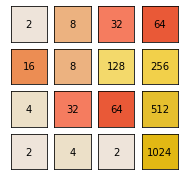

In [15]:
cell_colors = {
    0: '#FFFFFF',
    2: '#EEE4DA',
    4: '#ECE0C8',
    8: '#ECB280',
    16:'#EC8D53',
    32:'#F57C5F',
    64:'#E95937',
    128:'#F3D96B',
    256:'#F2D04A',
    512:'#E5BF2E',
    1024:'#E2B814',
    2048:'#EBC502',
    4096:'#00A2D8',
    8192:'#9ED682',
    16384:'#9ED682',
    32768:'#9ED682',
    65536:'#9ED682',
    131072:'#9ED682',
}

board = game_history[0]['new_board']

ncols = 4
nrows = 4

# create the plots
fig = plt.figure(figsize=(3,3))
# plt.suptitle('Best game')
axes = [ fig.add_subplot(nrows, ncols, r * ncols + c) for r in range(0, nrows) for c in range(1, ncols+1) ]

# add some data
v = np.reshape(board, -1)
for i, ax in enumerate(axes):
    ax.text(0.5, 0.5, str(int(v[i])) if int(v[i]) > 0 else ' ', horizontalalignment='center', verticalalignment='center')
    ax.set_facecolor(cell_colors[int(v[i])])

# remove the x and y ticks
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
i = 0
# if i < len(game_history) - 1:
#     plt.suptitle('S: %d, Action: %s, Reward: %d' % (i, action_label(game_history[i+1]['action']), game_history[i+1]['reward']))
# else:
#     plt.suptitle('Final state')

In [16]:
def update(i):
#     plt.clf()
    board = game_history[i]['new_board']
    v = np.reshape(board, -1)
    for i, ax in enumerate(axes):
        ax.cla()
        ax.text(0.5, 0.5, str(int(v[i])) if int(v[i]) > 0 else ' ', horizontalalignment='center', verticalalignment='center')
        ax.set_facecolor(cell_colors[int(v[i])])
        
    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])

    return axes

In [17]:
anim = FuncAnimation(fig, update, frames=np.arange(1, len(game_history)), interval=1000)

In [18]:
anim.save('./anim/%s_short.gif' % version, dpi=160, writer='imagemagick')

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [17]:
clip = mp.VideoFileClip("./anim/%s_short.gif" % version)
clip.write_videofile("./anim/%s_full.mp4" % version)

Moviepy - Building video ./anim/ohe_2_steps_move_penalty_log_reward_512_3_layers_random_full.mp4.
Moviepy - Writing video ./anim/ohe_2_steps_move_penalty_log_reward_512_3_layers_random_full.mp4



Moviepy - Done !
Moviepy - video ready ./anim/ohe_2_steps_move_penalty_log_reward_512_3_layers_random_full.mp4


In [6]:
for i, g in enumerate(game_history):
    if np.max(g['new_board']) == 2048.:
        print(i)
        break

1024


In [11]:
game_history = game_history[1015:1025]